# Particule Swarm Optimization
----
---

---

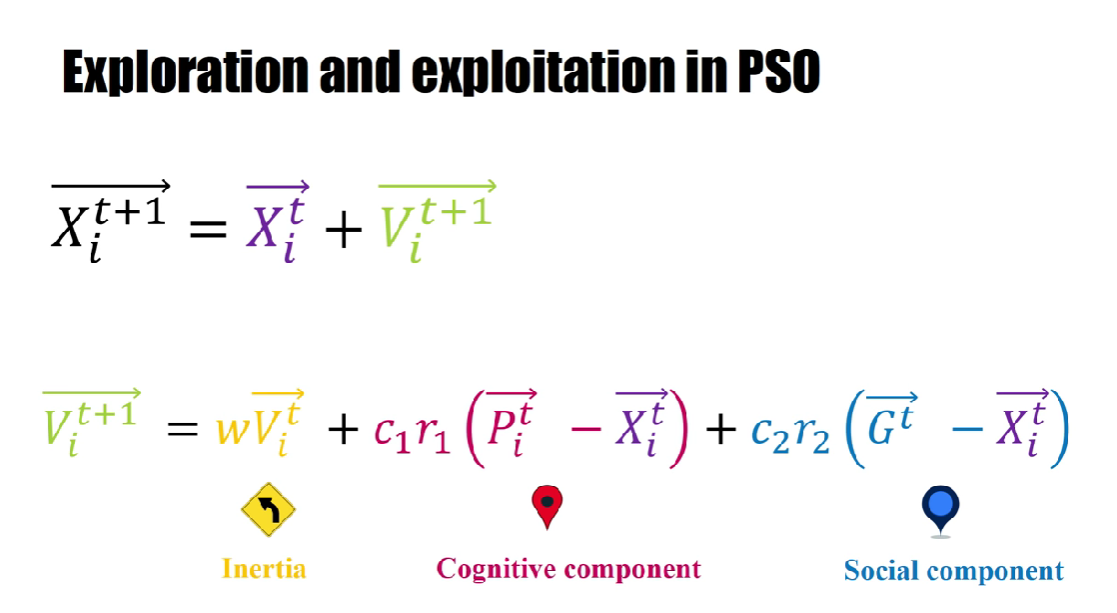


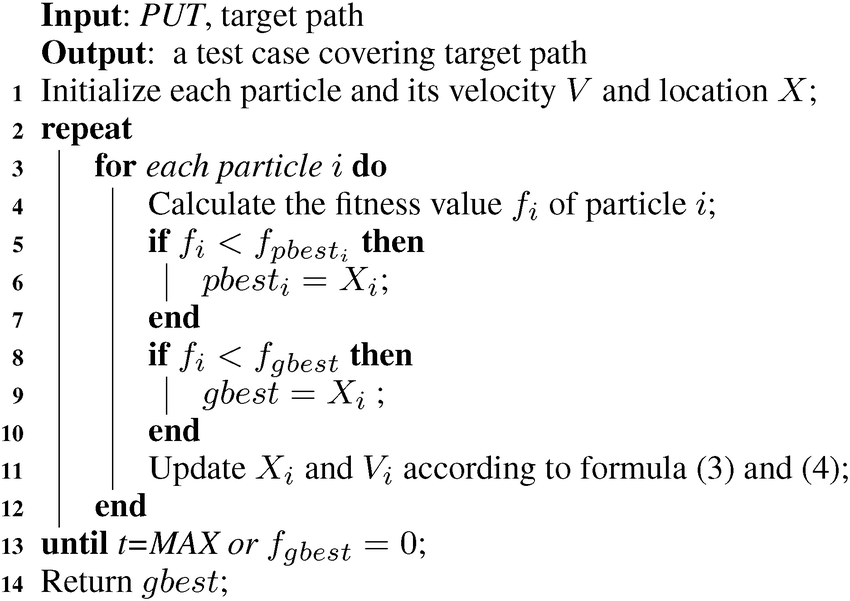

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [45]:
class Particle(object):
    def __init__(self):
        self.positions = []
        self.velocities = []
        self.fitness = 0
        
    def set_fitness(self, value):
        self.fitness = value
    
    def validate_bounds(self, lower_bound, upper_bound):
        for i in range(len(self.positions)):
            if self.positions[i] < lower_bound[i] or self.positions[i] > upper_bound[i]:
                self.positions[i] = random.uniform(lower_bound[i], upper_bound[i])
               
  
            

In [46]:
def initialize_swarm(size, lower_bound, upper_bound):
    num_dimensions = len(lower_bound)
    swarm = []
    for _ in range(size):
        particle = Particle()
        for j in range(num_dimensions):
            particle.positions.append(np.random.uniform(lower_bound[j], upper_bound[j]))
            particle.velocities.append(np.random.uniform(lower_bound[j], upper_bound[j]))
        swarm.append(particle)

    
    return swarm

In [47]:
def evaluate_swarm(swarm, function):
    for p in swarm:
        p.fitness = function(p.positions) 

In [48]:
def best_solution(swarm):
    fitness = swarm[0].fitness
    best = swarm[0]
    for particle in swarm:
        if particle.fitness < fitness: # si fuera maximizar sw.fitness > fitness
            best = particle
            fitness = particle.fitness
    return best

In [49]:
def print_swarm(swarm):
    for sw in swarm:
        print(sw.positions, '> ', sw.fitness)

In [60]:
def pso_algorithm(w, c1, c2, lower, upper, size_swarm, iterations, f):
    dimensions = len(lower)
    #Initialize the swarm
    x = initialize_swarm(size_swarm, lower, upper)
    #Evaluate the swarm
    evaluate_swarm(x, f)

    #print_swarm(x)

    y = x[:]
    y_best = best_solution(y)
    #print 'BEST ', y_best.X, '>>> ', y_best.fitness
    print('Primer y_best', y_best.positions)

    it = 0
    while it < iterations: #la mejor y la peor sean muy parecidas
        for i in range(len(x)): # x es el swarm
            particle = x[i]
            for j in range(dimensions):
                #Calcular la velocidad
                r1 = np.random.rand() # uniform random number r1
                r2 = np.random.rand() # uniform random number r2
                particle.velocities[j] = w * particle.velocities[j] + c1 * r1 * (y[i].positions[j] - particle.positions[j]) + c2 * r2 * (y_best.positions[j] - particle.positions[j])
                #Actualizar la posicion de particle.X
                particle.positions[j] = particle.positions[j] + particle.velocities[j]

            particle.validate_bounds(lower, upper)
                
            #Evaluar la nueva posicion de X
            particle.fitness = f(particle.positions)
            
            if particle.fitness <= y[i].fitness:
                y[i] = particle
            if particle.fitness <= y_best.fitness:
                print('y_best actual:',y_best.positions)
                y_best = particle
                print('numeo', y_best.positions)
            #print 'solution ', y_best.X, '>>> ', y_best.fitness
            x[i] = particle
        
        it +=1

    return y_best

In [56]:
def function1(x):
    # -5 <= x[0], x[1] <= 10    min(3,0.5)
    #(1.5 - x*(1-y))**2 + (2.25-x*(1-y**2))**2 + (2.625-x*(1-y**3))**2
    return (1.5 - x[0]*(1-x[1]))**2 + (2.25-x[0]*(1-x[1]**2))**2 + (2.625-x[0]*(1-x[1]**3))**2


In [57]:
def rastrigin(x):
  A = 10 * len(x)
  result = 0
  for i in range(len(x)):
    result += x[i]**2 - 10*np.cos(2*np.pi*x[i])

  return A*result

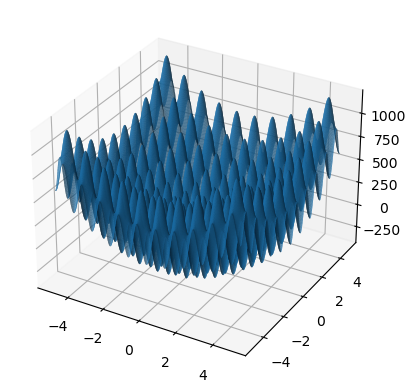

In [58]:

# Generar datos para la grafica
X = np.linspace(-5, 5, 400)
Y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(X, Y)
Z = rastrigin([X,Y])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
   linewidth=0.08,
  antialiased=True)
plt.show()

In [66]:
def rastrigin(X):
  sum = 0
  for i in range(0, len(X)):
    sum += X[i]**2 - (10 * np.cos(2*np.pi*X[i]))
  return sum + (10 * len(X))

In [68]:
size = 3
lower = [0 for x in range(size)] # -2.048
upper = [1 for x in range(size)] # 2.048

iterations = 1000

size_swarm = 200
w = 0.5
c1 = 0.2 # intenta regresar
c2 = 0.3 # se acerca al lider
function = rastrigin
best = pso_algorithm(w, c1, c2, lower, upper, size_swarm, iterations, function)

print('solution ', best.positions, '>>> ', best.fitness)

Primer y_best [0.050872583764004276, 0.9892589603358604, 0.967266067893037]
y_best actual: [0.15680980768057978, 0.08624459109341054, 0.3799799333275796]
numeo [0.15680980768057978, 0.08624459109341054, 0.3799799333275796]
y_best actual: [0.15680980768057978, 0.08624459109341054, 0.3799799333275796]
numeo [0.8358810490930417, 0.8589330806893629, 0.1591894140627172]
y_best actual: [0.8358810490930417, 0.8589330806893629, 0.1591894140627172]
numeo [0.9228193911034145, 0.8901471866924453, 0.9509094664718587]
y_best actual: [0.9228193911034145, 0.8901471866924453, 0.9509094664718587]
numeo [0.9796360635721213, 0.9231864849390025, 0.898178739341951]
y_best actual: [0.9796360635721213, 0.9231864849390025, 0.898178739341951]
numeo [0.9909209283302676, 0.8971579125552993, 0.9845478442856997]
y_best actual: [0.9909209283302676, 0.8971579125552993, 0.9845478442856997]
numeo [0.9939598456551985, 0.9793152214955219, 0.9234592070468698]
y_best actual: [0.9939598456551985, 0.9793152214955219, 0.9234

y_best actual: [1.9069269452335068e-05, 0.0008395056863566987, 0.00047421565194464307]
numeo [1.9069269452335068e-05, 0.0008395056863566987, 0.00047421565194464307]
y_best actual: [1.9069269452335068e-05, 0.0008395056863566987, 0.00047421565194464307]
numeo [0.00045359684070568835, 2.7396065595428564e-05, 0.0003694641706582993]
y_best actual: [0.10137706572254379, 0.353230918280769, 0.0003616144809811164]
numeo [0.10137706572254379, 0.353230918280769, 0.0003616144809811164]
y_best actual: [0.10137706572254379, 0.353230918280769, 0.0003616144809811164]
numeo [0.029663749173958556, 0.2598052204401525, 0.043995144725452025]
y_best actual: [0.029663749173958556, 0.2598052204401525, 0.043995144725452025]
numeo [0.00694465148404584, 0.03898330466092664, 0.059212796325964864]
y_best actual: [0.00694465148404584, 0.03898330466092664, 0.059212796325964864]
numeo [0.0018063631944369631, 0.0074559325646988694, 0.011894016989402704]
y_best actual: [0.0018063631944369631, 0.0074559325646988694, 0.0

y_best actual: [0.00030612673709696847, 0.000505674276168161, 0.00034279160425815204]
numeo [0.00030612673709696847, 0.000505674276168161, 0.00034279160425815204]
y_best actual: [0.0003086942634651974, 0.000505741179181392, 0.00034076379834301616]
numeo [0.0003086942634651974, 0.000505741179181392, 0.00034076379834301616]
y_best actual: [0.0003086942634651974, 0.000505741179181392, 0.00034076379834301616]
numeo [0.00032191038623684997, 0.0005067795792752155, 7.603846993088951e-05]
y_best actual: [0.0003145169301069125, 0.0005064729578354711, 0.37158817882992834]
numeo [0.0003145169301069125, 0.0005064729578354711, 0.37158817882992834]
y_best actual: [0.0003145169301069125, 0.0005064729578354711, 0.37158817882992834]
numeo [0.0003273653158586511, 0.985808866737333, 0.07419715545984959]
y_best actual: [0.0003273653158586511, 0.985808866737333, 0.07419715545984959]
numeo [0.02423386617629114, 0.021031314498445294, 0.04286975385320794]
y_best actual: [0.02423386617629114, 0.021031314498445

y_best actual: [7.525673732683633e-05, 0.0003926299520609486, 0.000589400194700166]
numeo [0.00024516530766134864, 0.0003919876519078643, 0.00031099847090619045]
y_best actual: [0.00022899282659337385, 0.0003917585767587171, 0.000305585396190961]
numeo [0.00022899282659337385, 0.0003917585767587171, 0.000305585396190961]
y_best actual: [0.00022090658605938645, 0.0003916440391841435, 0.00030287885883334626]
numeo [0.00022090658605938645, 0.0003916440391841435, 0.00030287885883334626]
y_best actual: [0.00021686346579239275, 0.00039158677039685674, 0.00030152559015453887]
numeo [0.00021686346579239275, 0.00039158677039685674, 0.00030152559015453887]
y_best actual: [0.0002148419056588959, 0.0003915581360032133, 0.0003008489558151352]
numeo [0.0002148419056588959, 0.0003915581360032133, 0.0003008489558151352]
y_best actual: [0.0002148419056588959, 0.0003915581360032133, 0.0003008489558151352]
numeo [0.00010623443943758785, 0.0003888935561716671, 0.0003272215956671008]
y_best actual: [8.9300

y_best actual: [0.002264787301816234, 0.0018746394773901704, 0.0005891546444346895]
numeo [0.0006816367758509906, 0.00043254877568017465, 0.0018916396967998813]
y_best actual: [0.0006816367758509906, 0.00043254877568017465, 0.0018916396967998813]
numeo [0.0005227454720960152, 0.00022708600877001015, 0.0009545576276530295]
y_best actual: [0.0003784086988400354, 0.0002634851653333113, 0.0010875320838707138]
numeo [0.0003784086988400354, 0.0002634851653333113, 0.0010875320838707138]
y_best actual: [0.0003784086988400354, 0.0002634851653333113, 0.0010875320838707138]
numeo [0.0001969291693584635, 0.000493172582167925, 0.0006163951045139387]
y_best actual: [0.00022148150331441073, 8.455078022673811e-06, 0.000683053773953969]
numeo [0.00022148150331441073, 8.455078022673811e-06, 0.000683053773953969]
y_best actual: [0.00023375767029238436, 0.3170460379462655, 0.0007163831086739842]
numeo [0.00023375767029238436, 0.3170460379462655, 0.0007163831086739842]
y_best actual: [0.0002337576702923843

y_best actual: [0.00026802091341597735, 0.00016357530589406404, 0.0002679326099868869]
numeo [0.00026802091341597735, 0.00016357530589406404, 0.0002679326099868869]
y_best actual: [0.00026802091341597735, 0.00016357530589406404, 0.0002679326099868869]
numeo [0.0002664541492421276, 0.00015196952498116367, 0.00027363540828375874]
y_best actual: [0.0002659309910809047, 0.00015094963968125558, 0.0002681452321583478]
numeo [0.0002659309910809047, 0.00015094963968125558, 0.0002681452321583478]
y_best actual: [0.0002656694120002932, 0.00015043969703130153, 0.0002654001440956423]
numeo [0.0002656694120002932, 0.00015043969703130153, 0.0002654001440956423]
y_best actual: [0.0002655386224599875, 0.00015018472570632453, 0.00026402760006428956]
numeo [0.0002655386224599875, 0.00015018472570632453, 0.00026402760006428956]
y_best actual: [0.0002654732276898346, 0.000150057240043836, 0.0002633413280486132]
numeo [0.0002654732276898346, 0.000150057240043836, 0.0002633413280486132]
y_best actual: [0.00

y_best actual: [0.17024865904417397, 0.1534067186527267, 0.00027753858070697374]
numeo [0.17024865904417397, 0.1534067186527267, 0.00027753858070697374]
y_best actual: [0.17024865904417397, 0.1534067186527267, 0.00027753858070697374]
numeo [0.040355345145302, 0.0474343754347346, 0.028033400661153056]
y_best actual: [0.040355345145302, 0.0474343754347346, 0.028033400661153056]
numeo [0.0287985593142764, 0.009310881880393996, 0.020408537647555222]
y_best actual: [0.0287985593142764, 0.009310881880393996, 0.020408537647555222]
numeo [0.0010876642935131592, 0.002987696881789122, 0.004720326781850761]
y_best actual: [0.0010876642935131592, 0.002987696881789122, 0.004720326781850761]
numeo [0.0023162866590453663, 0.0003546618026300829, 0.0016599557803019388]
y_best actual: [0.0023162866590453663, 0.0003546618026300829, 0.0016599557803019388]
numeo [0.0007321209506535197, 0.00028381823499529896, 0.000547593091556263]
y_best actual: [0.0007321209506535197, 0.00028381823499529896, 0.00054759309

y_best actual: [0.00018328606469656137, 0.00022128925696289056, 0.0002563680259436836]
numeo [0.0001831762965085281, 0.0002212901412021897, 0.00025637242590653594]
y_best actual: [0.00018311103666490027, 0.00022128997310269806, 0.00025637065696368014]
numeo [0.00018311103666490027, 0.00022128997310269806, 0.00025637065696368014]
y_best actual: [0.00018307840674308635, 0.00022128988905295224, 0.00025636977249225224]
numeo [0.00018307840674308635, 0.00022128988905295224, 0.00025636977249225224]
y_best actual: [0.00018307840674308635, 0.00022128988905295224, 0.00025636977249225224]
numeo [0.00018237420106424418, 0.00022128932652412417, 0.0001485147057673367]
y_best actual: [0.00018233772151693872, 0.00022128940168972725, 0.22153718698824898]
numeo [0.00018233772151693872, 0.00022128940168972725, 0.22153718698824898]
y_best actual: [0.00018233772151693872, 0.00022128940168972725, 0.22153718698824898]
numeo [0.021741283921911263, 0.00022128987554739668, 0.1939213325258448]
y_best actual: [0

y_best actual: [0.0003281721572332184, 0.0004207822773082304, 0.0003192951742622553]
numeo [0.0003281721572332184, 0.0004207822773082304, 0.0003192951742622553]
y_best actual: [0.0003281721572332184, 0.0004207822773082304, 0.0003192951742622553]
numeo [0.00025178272900920406, 0.00043611655216108255, 0.00034939977300199056]
y_best actual: [0.00025178272900920406, 0.00043611655216108255, 0.00034939977300199056]
numeo [0.00030664504032685473, 0.0004205678478871831, 0.00032009943905857505]
y_best actual: [0.00030664504032685473, 0.0004205678478871831, 0.00032009943905857505]
numeo [0.00024378147941266944, 0.00042927538249735124, 0.00034064557786983184]
y_best actual: [0.00023978085461440213, 0.00042585479766548556, 0.00033626848030375247]
numeo [0.00023978085461440213, 0.00042585479766548556, 0.00033626848030375247]
y_best actual: [0.00023778054221526847, 0.00042414450524955275, 0.0003340799315207128]
numeo [0.00023778054221526847, 0.00042414450524955275, 0.0003340799315207128]
y_best actu

y_best actual: [0.000126986836332612, 0.0002889659440096109, 0.00010578399736930311]
numeo [1.3923149595397588e-05, 0.00028896494162882787, 0.00010577293237454113]
y_best actual: [0.3978323920426914, 0.0002889646824792935, 0.00010577262404979031]
numeo [0.3978323920426914, 0.0002889646824792935, 0.00010577262404979031]
y_best actual: [0.3978323920426914, 0.0002889646824792935, 0.00010577262404979031]
numeo [0.8489749403172594, 0.00028896474944607953, 0.03781645167514827]
y_best actual: [0.8489749403172594, 0.00028896474944607953, 0.03781645167514827]
numeo [0.14258176821969126, 0.0002889648691540122, 0.002616992824600678]
y_best actual: [0.14258176821969126, 0.0002889648691540122, 0.002616992824600678]
numeo [0.04073922372315833, 0.0002889684748331374, 0.014296057863353247]
y_best actual: [0.04073922372315833, 0.0002889684748331374, 0.014296057863353247]
numeo [0.005145750258752311, 0.0002889670946846366, 0.0021460520048879102]
y_best actual: [0.005145750258752311, 0.000288967094684636

y_best actual: [8.807302812380322e-05, 0.00019657434117346576, 0.00010979046500367305]
numeo [8.807302812380322e-05, 0.00019657434117346576, 0.00010979046500367305]
y_best actual: [8.791193738525315e-05, 0.00019657822542536272, 0.00010978280109135756]
numeo [8.791193738525315e-05, 0.00019657822542536272, 0.00010978280109135756]
y_best actual: [8.783139201597812e-05, 0.0001965801675513112, 0.00010977896913519982]
numeo [8.783139201597812e-05, 0.0001965801675513112, 0.00010977896913519982]
y_best actual: [8.783139201597812e-05, 0.0001965801675513112, 0.00010977896913519982]
numeo [7.810027475985574e-05, 0.00019646118421074194, 0.0001108813995856112]
y_best actual: [3.1786498458155634e-05, 0.00019649241534756536, 0.00010959834620624277]
numeo [3.1786498458155634e-05, 0.00019649241534756536, 0.00010959834620624277]
y_best actual: [8.629610307305583e-06, 0.00019650803091597708, 0.00010895681951655856]
numeo [8.629610307305583e-06, 0.00019650803091597708, 0.00010895681951655856]
y_best actua

y_best actual: [0.9742899859989507, 0.00012887777595237823, 0.0009172406843154734]
numeo [0.0049138252184669174, 0.00013044116406594949, 0.037617926069701435]
y_best actual: [0.0049138252184669174, 0.00013044116406594949, 0.037617926069701435]
numeo [0.004783441198408728, 0.00012865374257074692, 0.006302494931356172]
y_best actual: [0.004783441198408728, 0.00012865374257074692, 0.006302494931356172]
numeo [0.0016744489532676053, 0.00012582955110178643, 0.0016099751195540542]
y_best actual: [0.0016744489532676053, 0.00012582955110178643, 0.0016099751195540542]
numeo [0.0009261920697417876, 0.00015745062190483184, 0.0008461078820722005]
y_best actual: [0.0009261920697417876, 0.00015745062190483184, 0.0008461078820722005]
numeo [0.00042031480302297036, 0.0001435461508475325, 0.0009314925902386437]
y_best actual: [0.00042031480302297036, 0.0001435461508475325, 0.0009314925902386437]
numeo [0.00019011080878980795, 0.00013488251023650687, 0.0009794035486807402]
y_best actual: [0.000190110808

y_best actual: [0.00012377990026552648, 0.00024134477804642535, 0.0005340670266342079]
numeo [0.00012377990026552648, 0.00024134477804642535, 0.0005340670266342079]
y_best actual: [0.00012387712654437212, 0.00024134479634157853, 0.0005337104982613864]
numeo [0.00012387712654437212, 0.00024134479634157853, 0.0005337104982613864]
y_best actual: [0.00012392573968379492, 0.00024134480548915514, 0.0005335322340749757]
numeo [0.00012392573968379492, 0.00024134480548915514, 0.0005335322340749757]
y_best actual: [0.00012392573968379492, 0.00024134480548915514, 0.0005335322340749757]
numeo [2.5569290681702807e-05, 0.00024117056127327175, 0.0005089833550982184]
y_best actual: [4.825973070260841e-06, 0.00024118210611239312, 0.0004473019640046102]
numeo [4.825973070260841e-06, 0.00024118210611239312, 0.0004473019640046102]
y_best actual: [0.6699427398135003, 0.0002411878785319538, 0.0004164612684578061]
numeo [0.6699427398135003, 0.0002411878785319538, 0.0004164612684578061]
y_best actual: [0.6699

y_best actual: [0.00016148951941006881, 0.000338331923943274, 0.00021925234253182622]
numeo [0.00016148951941006881, 0.000338331923943274, 0.00021925234253182622]
y_best actual: [0.00016148951941006881, 0.000338331923943274, 0.00021925234253182622]
numeo [7.753814290676069e-05, 0.00034315519092328856, 0.00021679350612005568]
y_best actual: [0.41128939280776333, 0.0003433802314300819, 0.0002165218057068993]
numeo [0.41128939280776333, 0.0003433802314300819, 0.0002165218057068993]
y_best actual: [0.41128939280776333, 0.0003433802314300819, 0.0002165218057068993]
numeo [0.1544080213822146, 0.00034008030191477696, 0.00021877738926707837]
y_best actual: [0.1544080213822146, 0.00034008030191477696, 0.00021877738926707837]
numeo [0.04246109780923577, 0.012365039677961754, 0.03816787273861508]
y_best actual: [0.04246109780923577, 0.012365039677961754, 0.03816787273861508]
numeo [0.017512628747059777, 0.009813982301339137, 0.0006793868550756257]
y_best actual: [0.017512628747059777, 0.009813982

y_best actual: [6.164835530444268e-05, 0.00016299225229170257, 0.06294192857344749]
numeo [6.164835530444268e-05, 0.00016299225229170257, 0.06294192857344749]
y_best actual: [6.164835530444268e-05, 0.00016299225229170257, 0.06294192857344749]
numeo [6.152775790764929e-05, 0.03702502965941519, 0.002081599260745512]
y_best actual: [6.152775790764929e-05, 0.03702502965941519, 0.002081599260745512]
numeo [0.002308387286741098, 0.0011492598217505289, 0.00014215460100131447]
y_best actual: [0.002308387286741098, 0.0011492598217505289, 0.00014215460100131447]
numeo [0.00046913149512080597, 0.00041512310222223804, 6.536854144453007e-05]
y_best actual: [0.00046913149512080597, 0.00041512310222223804, 6.536854144453007e-05]
numeo [0.0001651559038283056, 0.00020037157012677128, 3.634792683504161e-05]
y_best actual: [0.0001651559038283056, 0.00020037157012677128, 3.634792683504161e-05]
numeo [6.935216220013829e-05, 0.0001739901480640891, 4.111422988542572e-05]
y_best actual: [6.935216220013829e-05

y_best actual: [1.1313818449328474e-05, 0.0001403191675084939, 2.118306729903221e-05]
numeo [1.1313818449328474e-05, 0.0001403191675084939, 2.118306729903221e-05]
y_best actual: [1.1132663846129183e-05, 0.00014020002980494122, 2.1175478220843086e-05]
numeo [1.1132663846129183e-05, 0.00014020002980494122, 2.1175478220843086e-05]
y_best actual: [1.1132663846129183e-05, 0.00014020002980494122, 2.1175478220843086e-05]
numeo [1.4259639742273228e-05, 0.00013948963748144344, 2.0813154769510517e-05]
y_best actual: [1.4259639742273228e-05, 0.00013948963748144344, 2.0813154769510517e-05]
numeo [1.538469991426591e-05, 0.0001391731954901766, 2.1541022117548972e-05]
y_best actual: [1.538469991426591e-05, 0.0001391731954901766, 2.1541022117548972e-05]
numeo [1.3453711216101828e-05, 0.0001388083291119449, 2.0880608500814495e-05]
y_best actual: [1.3050746953016128e-05, 0.00013846767492719562, 2.0914335366466483e-05]
numeo [1.3050746953016128e-05, 0.00013846767492719562, 2.0914335366466483e-05]
y_best 

y_best actual: [1.2546272674241896e-05, 0.00013786191739636637, 2.088105388100934e-05]
numeo [1.2546272674241896e-05, 0.00013786191739636637, 2.088105388100934e-05]
y_best actual: [1.2546272674241896e-05, 0.00013786191739636637, 2.088105388100934e-05]
numeo [1.2546272739193378e-05, 0.00013786191685594381, 2.088105398296785e-05]
y_best actual: [1.2546272886316066e-05, 0.00013786191628889976, 2.088105398628723e-05]
numeo [1.2546272886316066e-05, 0.00013786191628889976, 2.088105398628723e-05]
y_best actual: [1.254627295987741e-05, 0.00013786191600537772, 2.088105398794692e-05]
numeo [1.254627295987741e-05, 0.00013786191600537772, 2.088105398794692e-05]
y_best actual: [1.254627299665808e-05, 0.00013786191586361672, 2.0881053988776766e-05]
numeo [1.254627299665808e-05, 0.00013786191586361672, 2.0881053988776766e-05]
y_best actual: [1.2546273015048416e-05, 0.00013786191579273621, 2.0881053989191687e-05]
numeo [1.2546273015048416e-05, 0.00013786191579273621, 2.0881053989191687e-05]
y_best act

y_best actual: [0.000405925714963202, 0.0003531350421824966, 2.095397431696129e-05]
numeo [0.000405925714963202, 0.0003531350421824966, 2.095397431696129e-05]
y_best actual: [0.0004030261099269387, 0.00035398240216021065, 2.0946876289508528e-05]
numeo [0.0004030261099269387, 0.00035398240216021065, 2.0946876289508528e-05]
y_best actual: [0.0004015763074088071, 0.00035440608214906764, 2.0943327275782147e-05]
numeo [0.0004015763074088071, 0.00035440608214906764, 2.0943327275782147e-05]
y_best actual: [0.0004015763074088071, 0.00035440608214906764, 2.0943327275782147e-05]
numeo [0.00046257593341560773, 0.00018754181483754406, 2.098501741678666e-05]
y_best actual: [0.00044018094190052505, 0.0001657159478648619, 2.096059654641324e-05]
numeo [0.00044018094190052505, 0.0001657159478648619, 2.096059654641324e-05]
y_best actual: [0.00042898344614298374, 0.00015480301437852085, 2.0948386111226528e-05]
numeo [0.00042898344614298374, 0.00015480301437852085, 2.0948386111226528e-05]
y_best actual: [

y_best actual: [0.0002684561625419637, 0.0006789054116002486, 0.010895389435238538]
numeo [0.009782937748572963, 0.0006814011905033558, 0.001245516310839455]
y_best actual: [0.009782937748572963, 0.0006814011905033558, 0.001245516310839455]
numeo [0.0023000002906222138, 0.004498116575295795, 0.00015315331649484018]
y_best actual: [0.0023000002906222138, 0.004498116575295795, 0.00015315331649484018]
numeo [0.0004490375857639886, 0.0007899010353383216, 0.0003217373601091313]
y_best actual: [0.0004490375857639886, 0.0007899010353383216, 0.0003217373601091313]
numeo [0.0002267982264022024, 0.0006905181055069242, 0.00023823839645749752]
y_best actual: [0.0002267982264022024, 0.0006905181055069242, 0.00023823839645749752]
numeo [0.00017270118050587767, 0.0006805949217607753, 0.00021466849051974643]
y_best actual: [0.00017270118050587767, 0.0006805949217607753, 0.00021466849051974643]
numeo [0.00015166080370512615, 0.0006846002445873698, 0.0002085274556016866]
y_best actual: [0.00015166080370

y_best actual: [7.92419026344323e-05, 0.00020868872715510317, 0.00018840864128557357]
numeo [7.92419026344323e-05, 0.00020868872715510317, 0.00018840864128557357]
y_best actual: [7.875989228185544e-05, 0.000208664974811295, 0.00018840497158774074]
numeo [7.875989228185544e-05, 0.000208664974811295, 0.00018840497158774074]
y_best actual: [7.851888710556702e-05, 0.00020865309863939092, 0.00018840313673882433]
numeo [7.851888710556702e-05, 0.00020865309863939092, 0.00018840313673882433]
y_best actual: [7.851888710556702e-05, 0.00020865309863939092, 0.00018840313673882433]
numeo [3.868618771880395e-05, 0.00020864042349501736, 0.00018840080775182747]
y_best actual: [0.8822576957517181, 0.00020865925702118844, 0.0001884003992350817]
numeo [0.8822576957517181, 0.00020865925702118844, 0.0001884003992350817]
y_best actual: [0.8822576957517181, 0.00020865925702118844, 0.0001884003992350817]
numeo [0.07320763973088482, 0.00020866920046528958, 0.011189441934675713]
y_best actual: [0.07320763973088

In [26]:
lower = [-5.0 for x in range(size)]

In [27]:
lower, upper

([-5.0, -5.0, -5.0], [10.0, 10.0, 10.0])

---

## Using PSO for Linear Regression

---

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("./Salary.csv")

In [10]:
df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
df.size

70

Text(0, 0.5, 'Salary')

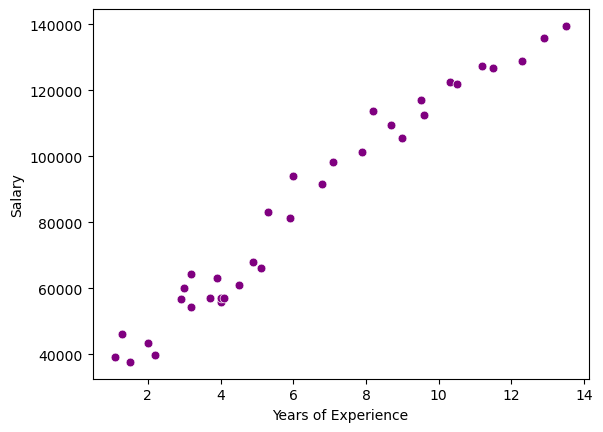

In [20]:
plt.figure()

sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], 
                s = 40, color = 'purple',
                data = df)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

We are using the Least Square Error method to do so
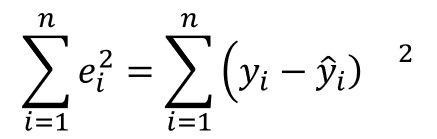

And we are looking for a function that looks like this:
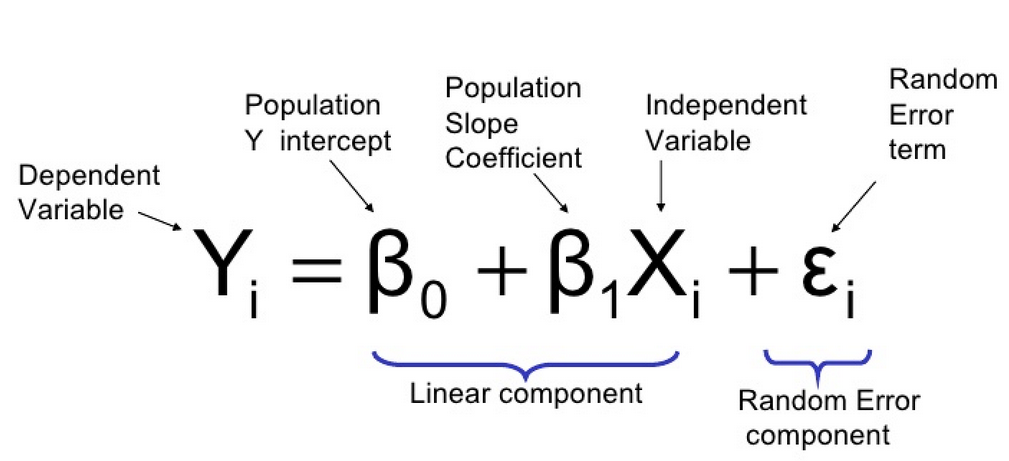

So lets define the function:

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [130]:
class Particle(object):
    def __init__(self):
        self.positions = []
        self.velocities = []
        self.fitness = 0
        
    def set_fitness(self, value):
        self.fitness = value
    
    def validate_bounds(self, lower_bound, upper_bound):
        for i in range(len(self.positions)):
            if self.positions[i] < lower_bound[i] or self.positions[i] > upper_bound[i]:
                self.positions[i] = random.uniform(lower_bound[i], upper_bound[i])

In [131]:
def initialize_swarm(size, lower_bound, upper_bound):
    num_dimensions = len(lower_bound)
    swarm = []
    for _ in range(size):
        particle = Particle()
        for j in range(num_dimensions):
            particle.positions.append(np.random.uniform(lower_bound[j], upper_bound[j]))
            particle.velocities.append(np.random.uniform(lower_bound[j], upper_bound[j]))
        swarm.append(particle)

    
    return swarm

In [139]:
def best_solution(swarm):
    fitness = swarm[0].fitness
    best = swarm[0]
    for particle in swarm:
        if particle.fitness < fitness: # si fuera maximizar sw.fitness > fitness
            best = particle
            fitness = particle.fitness
    
    print(best.positions)
            
    return best

In [140]:
def linear_regression(particle, x):
    return particle[0] + particle[1]*x
        

In [157]:
def least_square_error(particle, df):
    error = 0
    
    for index,row in df.iterrows():
        x = row['YearsExperience']
        y = row['Salary']
        yi = linear_regression(particle, x)
        error += (y - yi)**2
        

    return error
        
    

In [158]:
def evaluate_swarm_linear_regression(swarm, function, df):
    for p in swarm:
        p.fitness = function(p.positions, df) 

In [159]:
def pso_algorithm_linear_regression(w, c1, c2, lower, upper, size_swarm, iterations, function, data_frame):
    dimensions = len(lower)
    #Initialize the swarm
    swarm = initialize_swarm(size_swarm, lower, upper)
    #Evaluate the swarm
    evaluate_swarm_linear_regression(swarm, function, df)

    #print_swarm(x)

    y = swarm[:]
    y_best = best_solution(y)
    #print 'BEST ', y_best.X, '>>> ', y_best.fitness

    it = 0
    while it < iterations: #la mejor y la peor sean muy parecidas
        for i in range(len(swarm)): # x es el swarm
            particle = swarm[i]
            for j in range(dimensions):
                #Calcular la velocidad
                r1 = np.random.rand() # uniform random number r1
                r2 = np.random.rand() # uniform random number r2
                particle.velocities[j] = w * particle.velocities[j] + c1 * r1 * (y[i].positions[j] - particle.positions[j]) + c2 * r2 * (y_best.positions[j] - particle.positions[j])
                #Actualizar la posicion de particle.X
                particle.positions[j] = particle.positions[j] + particle.velocities[j]

            particle.validate_bounds(lower, upper)
                
            #Evaluar la nueva posicion de X
            particle.fitness = function(particle.positions, data_frame)
            
#           # particular
            if particle.fitness < y[i].fitness:
                y[i] = particle
            
            # Global
            if particle.fitness < y_best.fitness:
        
                y_best = particle

            #print 'solution ', y_best.X, '>>> ', y_best.fitness
            swarm[i] = particle
        
        it +=1

    return y_best

In [162]:
size = 2
lower = [0, 0] # -2.048
upper = [50000, 140000] # 2.048

iterations = 100

size_swarm = 1000
w = 0.5
c1 = 0.2 # intenta regresar
c2 = 0.3 # se acerca al lider
function = least_square_error
best = pso_algorithm_linear_regression(w, c1, c2, lower, upper, size_swarm, iterations, function, df)

print('solution ', best.positions, '>>> ', best.fitness)

[26247.525870585152, 9219.859779360848]
solution  [28859.52619390434, 8731.941046070231] >>>  1225236886.7795606


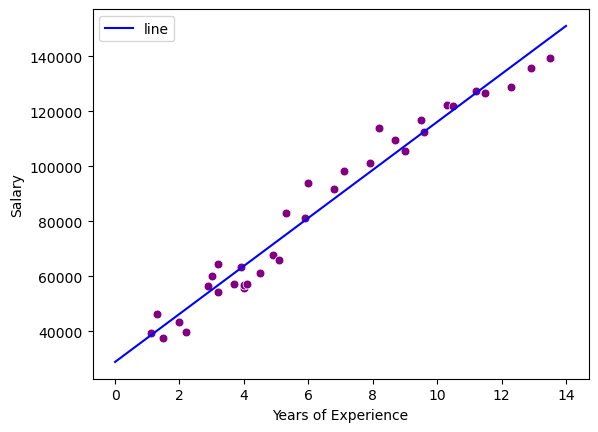

In [163]:
# Plot
x = np.linspace(0,14, 10)
y = linear_regression(best.positions, x)

plt.figure()
plt.plot(x, y, color='blue', label='line')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], 
                s = 40, color = 'purple',
                data = df)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()